In [1]:
# !/usr/bin/env python3

#cd ~/Desktop/snet/gits/lang-learn-repo/alex_tests

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import sys  
import subprocess
import pywt as pywt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [2]:
path = '~/Desktop/snet/gits/lang-learn-repo/alex_tests/data'
filenames = ['data11']
filename = filenames[0]

mode = pywt.Modes.smooth
level = 9

doc = pd.read_csv(path+"/"+filename+"/"+filename+".csv") 

In [3]:
def get_signal_decomp(data, w, level):
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(level):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    
    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    for i, y in enumerate(rec_a):
        out = y

    out = (out-min(out))/(max(out)-min(out))
        
    return out


In [4]:
varnames = doc.columns
varnames = varnames[:-1]
doc = doc[varnames]

wav = pd.DataFrame(columns=varnames)

for v in varnames:
    item = list(doc[v])
    wav[v] = get_signal_decomp(item, 'db2', level)
    
doc = doc.replace(np.nan,0)
wav = wav.replace(np.nan,0)

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [5]:
display(doc[:5])

,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/1,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/10,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/11,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/12,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/13,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/14,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/15,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/16,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/17,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/18,...,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__admin-down-interface-count,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__down-interface-count,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__up-interface-count,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_process-cpu__process-id_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-fifteen-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-fifteen-minute_0/RP0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-five-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-five-minute_0/RP0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-one-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-one-minute_0/RP0/CPU0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,26.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0
1,100000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,26.0,20794.0,2.0,1.0,3.0,2.0,4.0,3.0
2,100000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,26.0,20794.0,2.0,1.0,3.0,2.0,4.0,3.0
3,100000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,26.0,20794.0,2.0,1.0,3.0,2.0,4.0,3.0
4,100000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,26.0,20794.0,2.0,1.0,3.0,2.0,4.0,4.0


In [6]:
display(wav[:5])

,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/1,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/10,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/11,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/12,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/13,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/14,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/15,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/16,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/17,Cisco-IOS-XR-infra-statsd-oper_infra-statistics_interfaces_interface_cache_data-rate_bandwidth_HundredGigE0/0/0/18,...,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__admin-down-interface-count,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__down-interface-count,Cisco-IOS-XR-pfi-im-cmd-oper_interfaces_interface-summary_interface-counts__up-interface-count,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_process-cpu__process-id_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-fifteen-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-fifteen-minute_0/RP0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-five-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-five-minute_0/RP0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-one-minute_0/0/CPU0,Cisco-IOS-XR-wdsysmon-fd-oper_system-monitoring_cpu-utilization_total-cpu-one-minute_0/RP0/CPU0
0,0.772482,0.003772,0.002855,0.003072,0.003367,0.003825,0.003760,0.003394,0.002709,0.001835,...,0.301559,0.184355,0.699527,0.772361,0.764898,0.000793,0.770056,0.002276,0.772488,0.007386
1,0.780472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.301215,0.184384,0.699869,0.780351,0.772852,0.000000,0.778035,0.000000,0.780478,0.000000
2,0.696734,0.064453,0.055475,0.057889,0.061169,0.064866,0.064358,0.061469,0.053842,0.044119,...,0.321595,0.203386,0.679477,0.696623,0.689705,0.032517,0.694486,0.048443,0.696740,0.091577
3,0.637575,0.110626,0.095321,0.099444,0.105046,0.111327,0.110464,0.105559,0.092532,0.075925,...,0.336422,0.217304,0.664641,0.637470,0.630968,0.056109,0.635462,0.083297,0.637581,0.156638
4,0.602995,0.138517,0.119537,0.124664,0.131631,0.139382,0.138317,0.132268,0.116068,0.095417,...,0.345696,0.226138,0.655361,0.602894,0.596642,0.070775,0.600963,0.104560,0.603000,0.195181


In [7]:
maxi = 0
maxs = 0
labs = 0

for i in range(7,10):
    for t in range(10):
        #kmeans = KMeans(n_clusters=i, random_state=0).fit(wav.T)
        kmeans = KMeans(n_clusters=i).fit(wav.T)
        s = metrics.silhouette_score(wav.T, kmeans.labels_, metric='euclidean')
        if s > maxs:
            print(i,s)
            maxi = i
            maxs = s
            labs = kmeans.labels_
        
print(labs)

7 0.6741330439462769
7 0.6759126639822612
7 0.7405641285984781
[0 1 1 ... 1 0 4]


In [8]:
normDoc = doc.copy()
normWav = wav.copy()

for v in varnames:
    normDoc[v] = (normDoc[v]-min(normDoc[v]))/(max(normDoc[v])-min(normDoc[v]))
    
clusters = normDoc.T
clusters['cluster']=labs
clustwav = normWav.T
clustwav['cluster']=labs

In [9]:
display(clusters.groupby('cluster').count())

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152
cluster,,,,,,,,,,,,,,,,,,,,,
0,705,705,705,705,705,705,705,705,705,705,...,705,705,705,705,705,705,705,705,705,705
1,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,...,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160
2,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,914,914,914,914,914,914,914,914,914,914,...,914,914,914,914,914,914,914,914,914,914
4,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
5,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
6,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53


In [10]:
def wavPrinter(clusters,clustwav,c):
    test = clusters[clusters['cluster']==c]
    testw = clustwav[clustwav['cluster']==c]
    cols = test.columns
    
    fig = plt.figure(figsize=(20,10))

    for i in range(2,12):
        ax = fig.add_subplot(10, 2, 1 + (i-2) * 2)
        ax.plot(test[cols[int(len(cols)/i)]], 'r')
        ax.set_xlim(0, len(test[cols[int(len(cols)/i)]]) - 1)
        ax.set_ylabel("A%s" % cols[int(len(cols)/i)])
        
        ax = fig.add_subplot(10, 2, 2 + (i-2) * 2)
        ax.plot(testw[cols[int(len(cols)/i)]], 'g')
        ax.set_xlim(0, len(testw[cols[int(len(cols)/i)]]) - 1)
        ax.set_ylabel("D%s" % cols[int(len(cols)/i)]) 

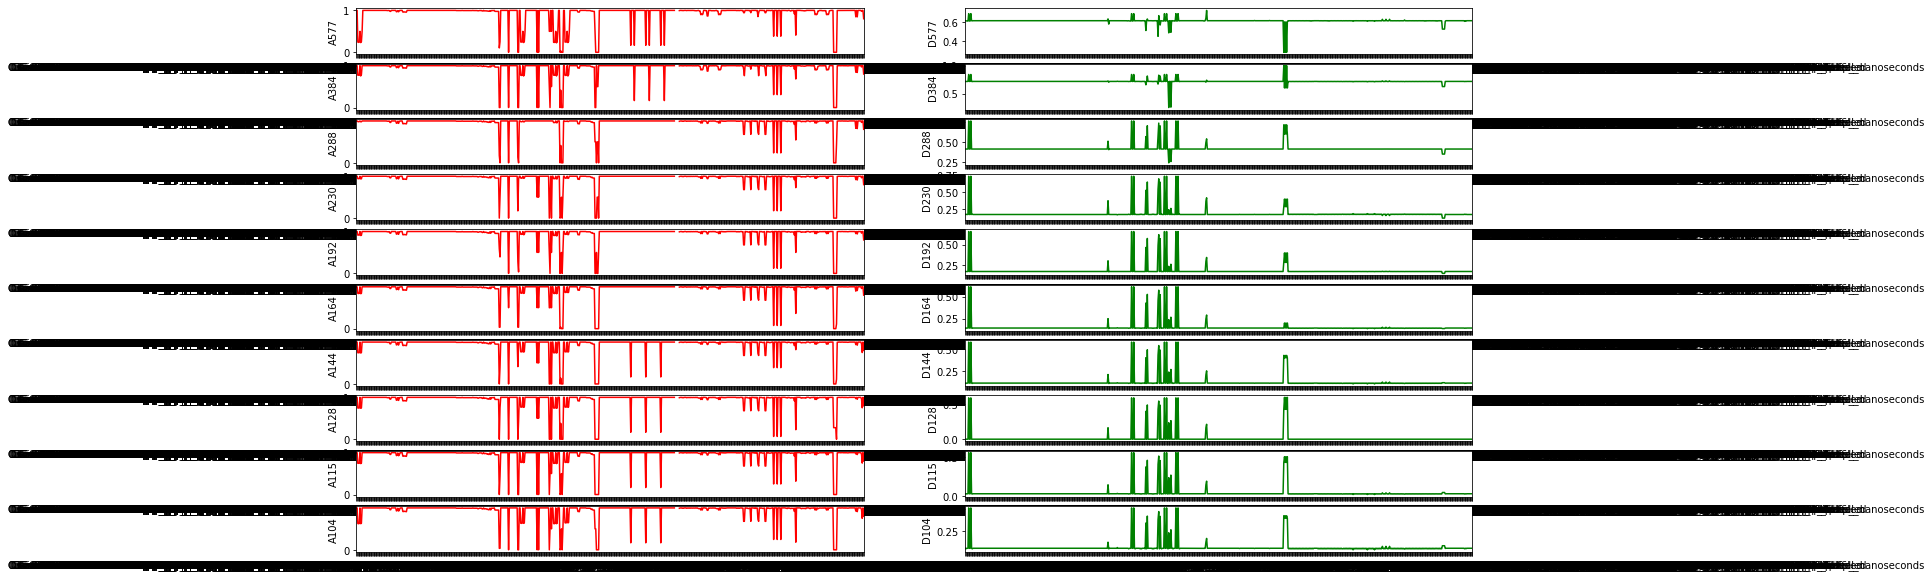

In [11]:
wavPrinter(clusters,clustwav,0)

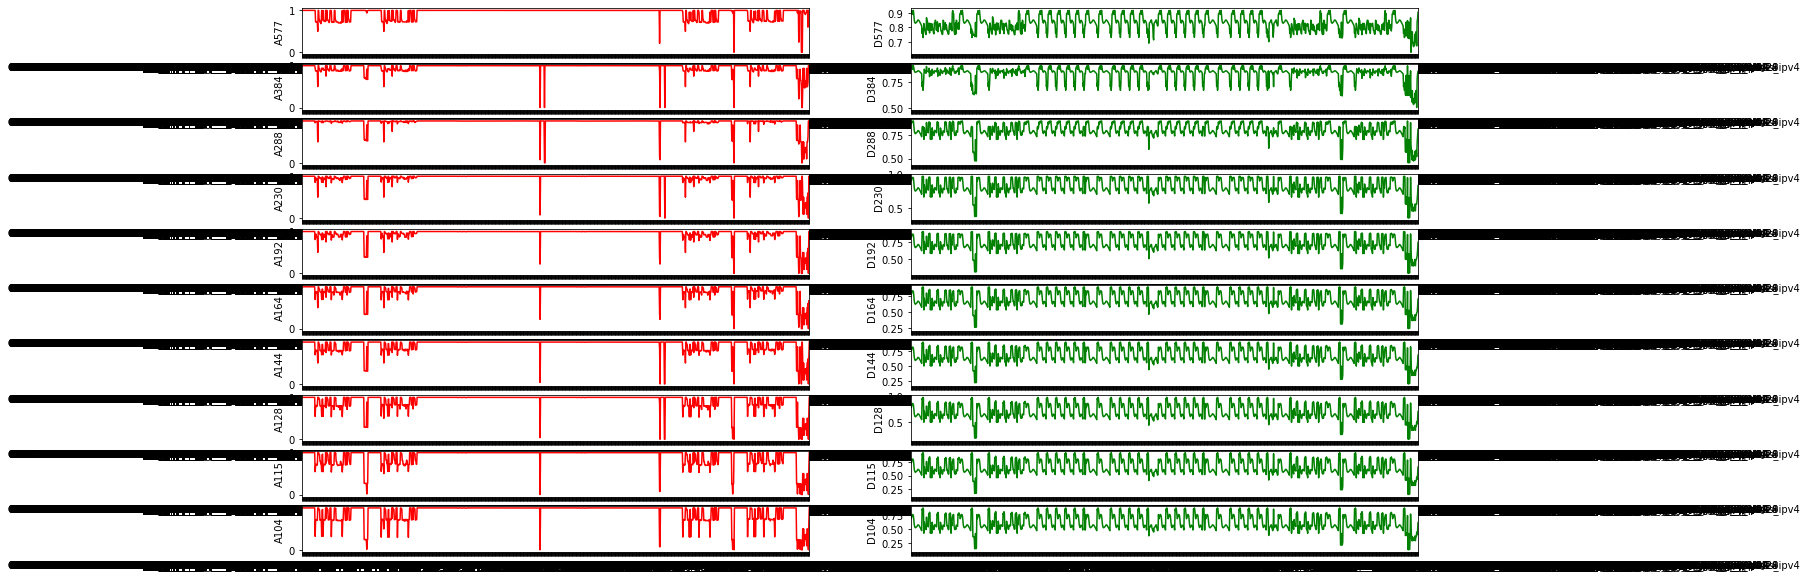

In [12]:
wavPrinter(clusters,clustwav,1)

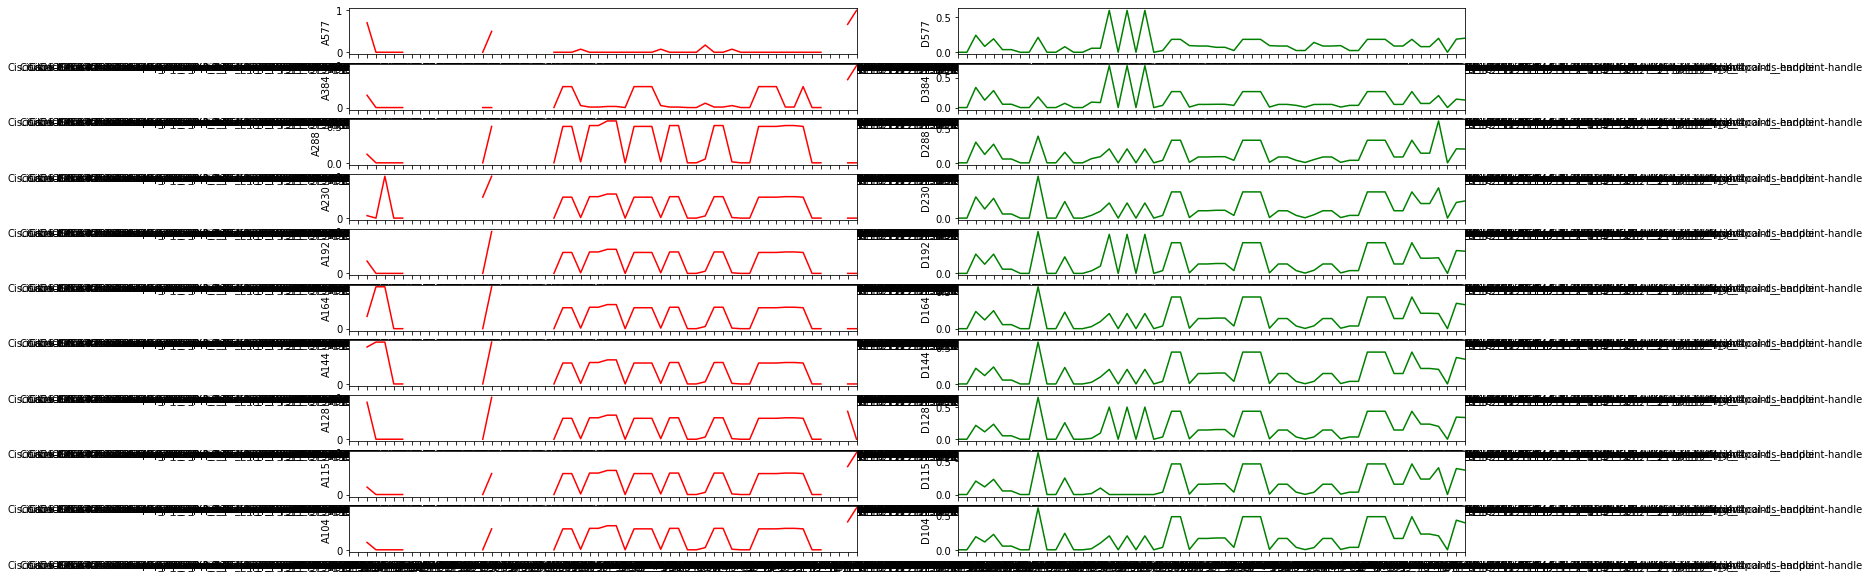

In [13]:
wavPrinter(clusters,clustwav,2)

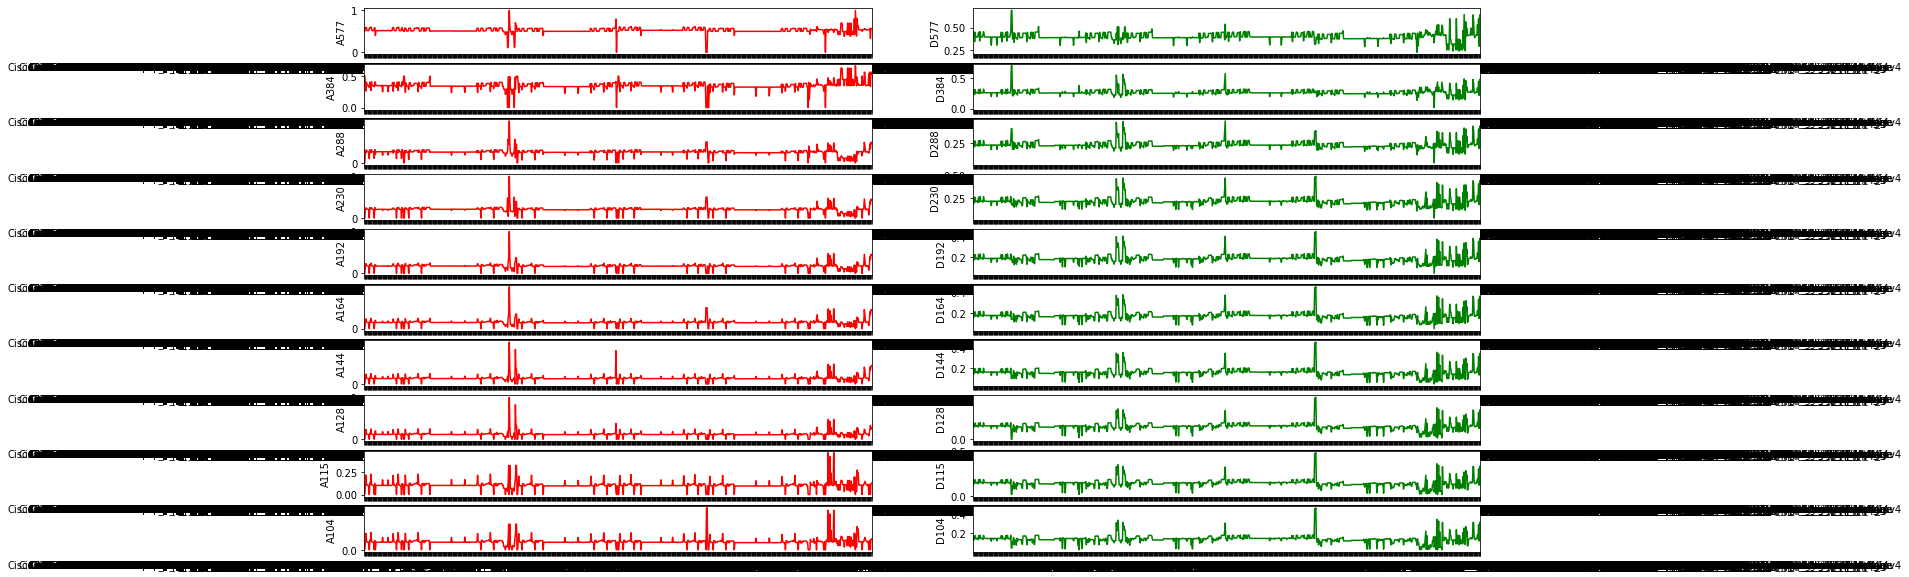

In [14]:
wavPrinter(clusters,clustwav,3)

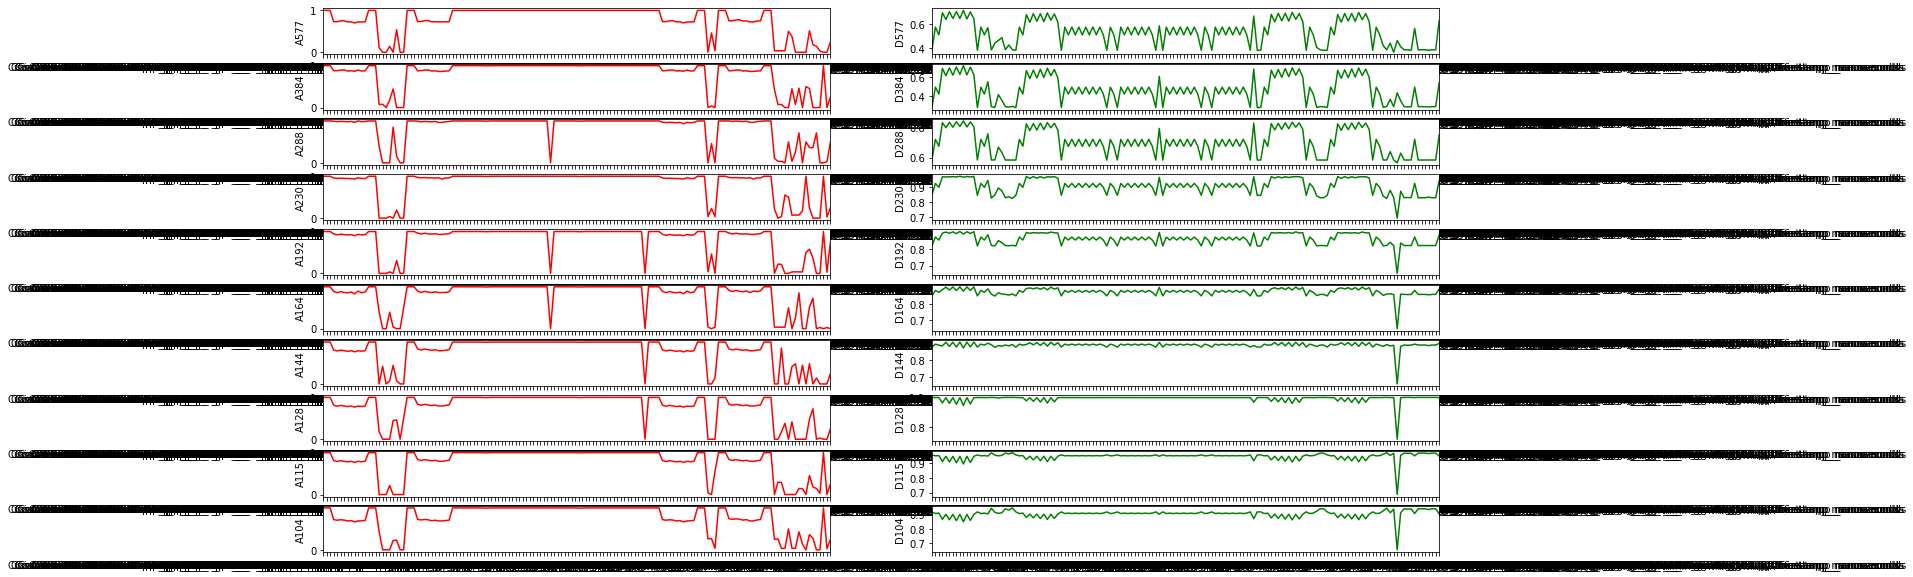

In [15]:
wavPrinter(clusters,clustwav,4)

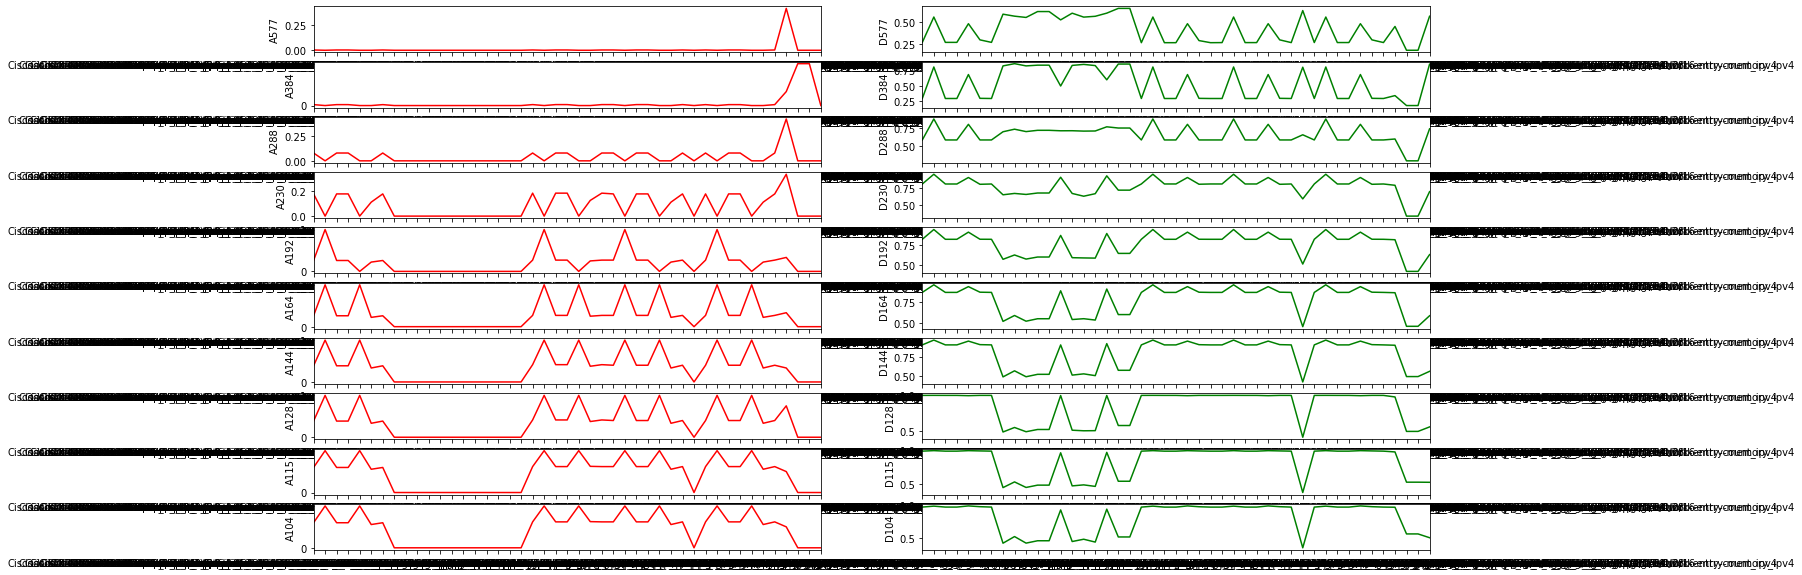

In [16]:
wavPrinter(clusters,clustwav,5)

In [17]:
clId = clustwav.copy()
clId = clId.iloc[:,-2:]
clId.iloc[:,0] = clId.index
clId = clId.reset_index(drop=True)
clId.columns = ['var','cluster']
clId

,var,cluster
0,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,0
1,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
2,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
3,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
4,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
5,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
6,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
7,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
8,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1
9,Cisco-IOS-XR-infra-statsd-oper_infra-statistic...,1


In [18]:
#clId.to_csv(path+"/"+filename+"/"+filename+"_clusters.csv",index=False) 